In [43]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# this notebook will be modified by me (Harshit Pathak) for the purpose 
# of my project, the original notebook is available at:
# https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb

# CIFAR10 (CNN)

In [44]:
import tensorflow as tf

from keras import datasets, models, layers
import matplotlib.pyplot as plt

In [45]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## No dataset dimensionality reduction algorithm

In [46]:
# train_images, train_labels, test_images, test_labels are ndarrays

print(len(train_images))
print(len(train_labels))

print(len(test_images))
print(len(test_labels))

50000
50000
10000
10000


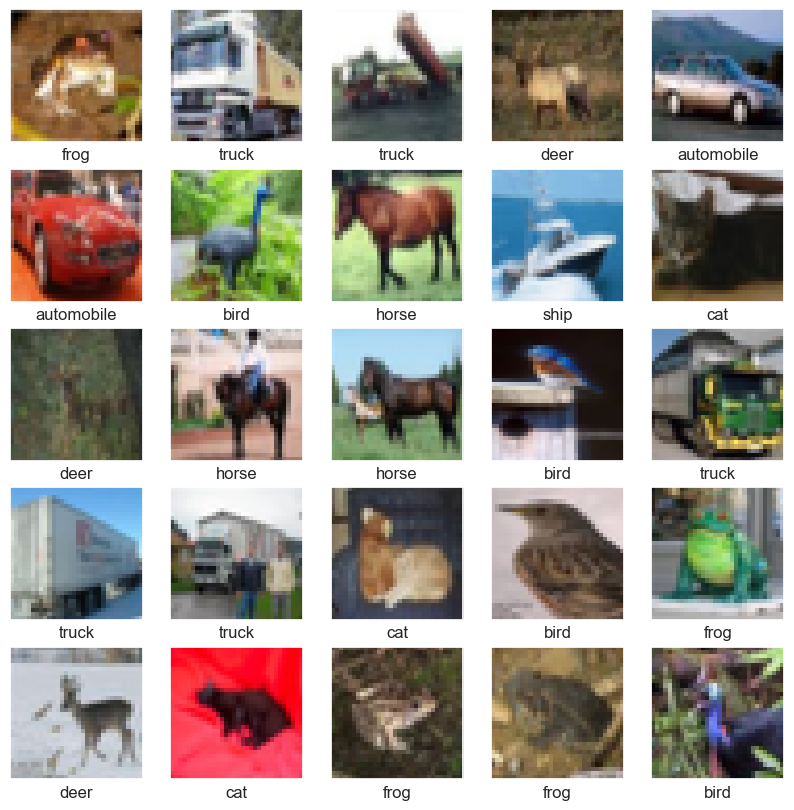

In [47]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [50]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.5234 - accuracy: 0.4456 - val_loss: 1.2477 - val_accuracy: 0.5461
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1674 - accuracy: 0.5860 - val_loss: 1.1041 - val_accuracy: 0.6136
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0196 - accuracy: 0.6424 - val_loss: 1.0493 - val_accuracy: 0.6380
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9214 - accuracy: 0.6757 - val_loss: 0.9850 - val_accuracy: 0.6537
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8501 - accuracy: 0.7015 - val_loss: 0.9149 - val_accuracy: 0.6885
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7941 - accuracy: 0.7219 - val_loss: 0.9744 - val_accuracy: 0.6622
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7446 - accuracy: 0.7382 - val_loss: 0.9052 -

313/313 - 1s - loss: 0.8663 - accuracy: 0.7108 - 1s/epoch - 4ms/step


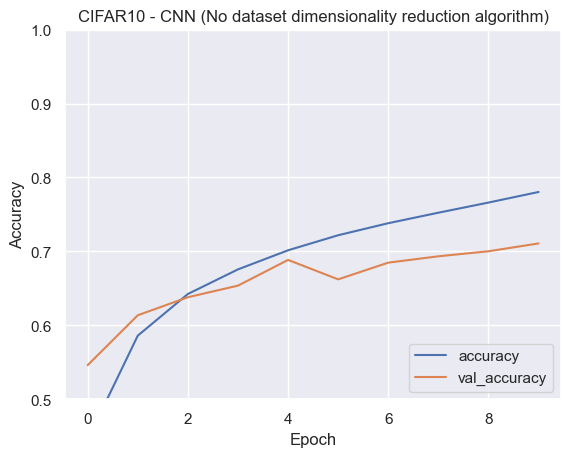

In [53]:
import seaborn as sns

sns.set_theme()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("CIFAR10 - CNN (No dataset dimensionality reduction algorithm)")

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [54]:
print(test_acc)

0.7107999920845032


## t-SNE

In [77]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(
    n_components = 3,
    learning_rate = 'auto',
    perplexity = 50
)

combined_images = np.concatenate((train_images, test_images))

# need to reshape as the TSNE.fit_transform() method can only
# take 2-dimensional numpy arrays
nsamples, nx, ny, nz = combined_images.shape
combined_images = combined_images.reshape((nsamples, nx*ny*nz))

In [78]:
combined_tsne = tsne.fit_transform(combined_images)

train_tsne = combined_tsne[:50000]

test_tsne = combined_tsne[-10000:]

d:\USyd\Thesis\Code\dimensionality-reduction-algos\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [79]:
train_tsne = train_tsne.reshape(train_tsne.shape[0], train_tsne.shape[1], 1)
test_tsne = test_tsne.reshape(test_tsne.shape[0], test_tsne.shape[1], 1)

print(train_tsne.shape)
print(test_tsne.shape)

(50000, 3, 1)
(10000, 3, 1)


In [80]:
n_timesteps = train_tsne.shape[1]
n_features = train_tsne.shape[2]

model_tsne = models.Sequential()
model_tsne.add(layers.Input(shape=(n_timesteps, n_features)))
model_tsne.add(layers.Conv1D(filters=64, kernel_size=1, activation='relu'))
model_tsne.add(layers.Dropout(0.5))
model_tsne.add(layers.Conv1D(filters=32, kernel_size=1, activation='relu'))
model_tsne.add(layers.Conv1D(filters=16, kernel_size=1, activation='relu'))
model_tsne.add(layers.MaxPooling1D(pool_size=2))

model_tsne.add(layers.Flatten())
model_tsne.add(layers.Dense(32, activation='relu'))
model_tsne.add(layers.Dense(n_features))

In [81]:
model_tsne.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 3, 64)             128       
                                                                 
 dropout_6 (Dropout)         (None, 3, 64)             0         
                                                                 
 conv1d_19 (Conv1D)          (None, 3, 32)             2080      
                                                                 
 conv1d_20 (Conv1D)          (None, 3, 16)             528       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 1, 16)            0         
 1D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 16)                0         
                                                      

In [82]:
model_tsne.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae'])

history_tsne = model_tsne.fit(train_tsne, train_labels, epochs=10, 
                    validation_data=(test_tsne, test_labels))

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 9.2105 - mae: 2.5741 - val_loss: 8.3795 - val_mae: 2.5046
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 8.3259 - mae: 2.4946 - val_loss: 8.2590 - val_mae: 2.4992
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 8.2833 - mae: 2.4936 - val_loss: 8.2396 - val_mae: 2.4949
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 8.2602 - mae: 2.4903 - val_loss: 8.2716 - val_mae: 2.4930
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 8.2583 - mae: 2.4918 - val_loss: 8.2183 - val_mae: 2.4912
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 8.2500 - mae: 2.4901 - val_loss: 8.2580 - val_mae: 2.4928
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 8.2473 - mae: 2.4899 - val_loss: 8.2331 - val_mae: 2.4911
Epoch 8/10
1563/1563 [==============================] - 3s 2ms

313/313 - 0s - loss: 8.2150 - mae: 2.4863 - 382ms/epoch - 1ms/step


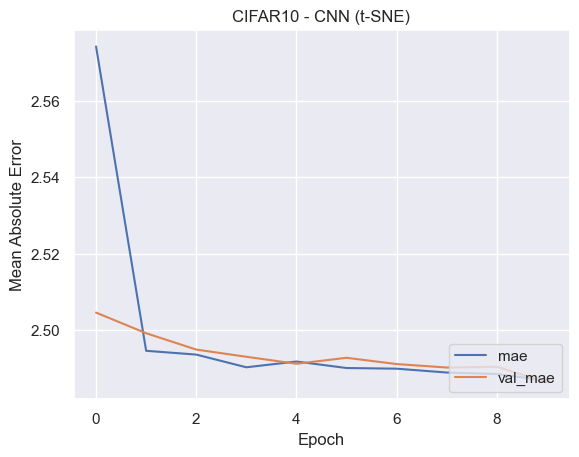

In [83]:
plt.plot(history_tsne.history['mae'], label='mae')
plt.plot(history_tsne.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='lower right')
plt.title("CIFAR10 - CNN (t-SNE)")

loss, mae = model_tsne.evaluate(test_tsne,  test_labels, verbose=2)

In [84]:
print(mae)

2.4863383769989014


## UMAP

In [85]:
import umap

combined_umap = umap.UMAP(
    n_neighbors = 50,
    min_dist = 0.1,
    n_components = 3,
    metric = 'euclidean'
).fit_transform(combined_images)

train_umap = combined_umap[:50000]

test_umap = combined_umap[-10000:]

In [86]:
train_umap = train_umap.reshape(train_umap.shape[0], train_umap.shape[1], 1)
test_umap = test_umap.reshape(test_umap.shape[0], test_umap.shape[1], 1)

print(train_umap.shape)
print(test_umap.shape)

(50000, 3, 1)
(10000, 3, 1)


In [87]:
n_timesteps = train_umap.shape[1]
n_features = test_umap.shape[2]

model_umap = models.Sequential()
model_umap.add(layers.Input(shape=(n_timesteps, n_features)))
model_umap.add(layers.Conv1D(filters=64, kernel_size=1, activation='relu'))
model_umap.add(layers.Dropout(0.5))
model_umap.add(layers.Conv1D(filters=32, kernel_size=1, activation='relu'))
model_umap.add(layers.Conv1D(filters=16, kernel_size=1, activation='relu'))
model_umap.add(layers.MaxPooling1D(pool_size=2))

model_umap.add(layers.Flatten())
model_umap.add(layers.Dense(32, activation='relu'))
model_umap.add(layers.Dense(n_features))

In [88]:
model_umap.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_21 (Conv1D)          (None, 3, 64)             128       
                                                                 
 dropout_7 (Dropout)         (None, 3, 64)             0         
                                                                 
 conv1d_22 (Conv1D)          (None, 3, 32)             2080      
                                                                 
 conv1d_23 (Conv1D)          (None, 3, 16)             528       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1, 16)            0         
 1D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 16)                0         
                                                      

In [89]:
model_umap.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae'])

history_umap = model_umap.fit(train_umap, train_labels, epochs=10, 
                    validation_data=(test_umap, test_labels))

Epoch 1/10
1563/1563 [==============================] - 5s 2ms/step - loss: 8.7642 - mae: 2.5401 - val_loss: 7.9096 - val_mae: 2.4395
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 8.0160 - mae: 2.4476 - val_loss: 7.7755 - val_mae: 2.4110
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 7.9295 - mae: 2.4310 - val_loss: 7.7282 - val_mae: 2.4049
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 7.8998 - mae: 2.4254 - val_loss: 7.6857 - val_mae: 2.3889
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 7.8806 - mae: 2.4195 - val_loss: 7.6738 - val_mae: 2.3787
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 7.8603 - mae: 2.4149 - val_loss: 7.6730 - val_mae: 2.3834
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 7.8540 - mae: 2.4135 - val_loss: 7.7134 - val_mae: 2.3878
Epoch 8/10
1563/1563 [==============================] - 3s 2ms

313/313 - 0s - loss: 7.7918 - mae: 2.4155 - 347ms/epoch - 1ms/step


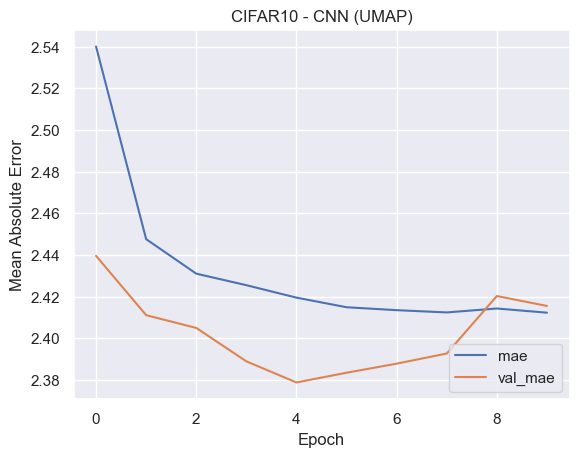

In [90]:
plt.plot(history_umap.history['mae'], label='mae')
plt.plot(history_umap.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='lower right')
plt.title("CIFAR10 - CNN (UMAP)")

loss, mae = model_umap.evaluate(test_umap,  test_labels, verbose=2)

In [91]:
print(mae)

2.4154860973358154


## PHATE

In [92]:
import phate

combined_phate = phate.PHATE(
    n_components = 4,
    knn = 15,
    decay = 40
).fit_transform(combined_images)

train_phate = combined_phate[:50000]
test_phate = combined_phate[-10000:]

Calculating PHATE...
  Running PHATE on 60000 observations and 3072 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 28.01 seconds.
    Calculating KNN search...
    Calculated KNN search in 707.13 seconds.
    Calculating affinities...
    Calculated affinities in 84.71 seconds.
  Calculated graph and diffusion operator in 821.25 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 25.69 seconds.
    Calculating KMeans...
    Calculated KMeans in 19.32 seconds.
  Calculated landmark operator in 48.21 seconds.
  Calculating optimal t...
    Automatically selected t = 18
  Calculated optimal t in 6.83 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.80 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 220.33 seconds.
Calculated PHATE in 1097.46 seconds.


In [93]:
train_phate = train_phate.reshape(train_phate.shape[0], train_phate.shape[1], 1)
test_phate = test_phate.reshape(test_phate.shape[0], test_phate.shape[1], 1)

print(train_phate.shape)
print(test_phate.shape)

(50000, 4, 1)
(10000, 4, 1)


In [94]:
n_timesteps = train_phate.shape[1]
n_features = test_phate.shape[2]

model_phate = models.Sequential()
model_phate.add(layers.Input(shape=(n_timesteps, n_features)))
model_phate.add(layers.Conv1D(filters=64, kernel_size=1, activation='relu'))
model_phate.add(layers.Dropout(0.5))
model_phate.add(layers.Conv1D(filters=32, kernel_size=1, activation='relu'))
model_phate.add(layers.Conv1D(filters=16, kernel_size=1, activation='relu'))
model_phate.add(layers.MaxPooling1D(pool_size=2))

model_phate.add(layers.Flatten())
model_phate.add(layers.Dense(32, activation='relu'))
model_phate.add(layers.Dense(n_features))

In [95]:
model_phate.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 4, 64)             128       
                                                                 
 dropout_8 (Dropout)         (None, 4, 64)             0         
                                                                 
 conv1d_25 (Conv1D)          (None, 4, 32)             2080      
                                                                 
 conv1d_26 (Conv1D)          (None, 4, 16)             528       
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 2, 16)            0         
 1D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 32)                0         
                                                     

In [96]:
model_phate.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae'])

history_phate = model_phate.fit(train_phate, train_labels, epochs=10, 
                    validation_data=(test_phate, test_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 2ms/step - loss: 8.5872 - mae: 2.5276 - val_loss: 8.3745 - val_mae: 2.4989
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 8.2928 - mae: 2.4973 - val_loss: 8.2867 - val_mae: 2.4971
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 8.2579 - mae: 2.4938 - val_loss: 8.2130 - val_mae: 2.4902
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 8.2065 - mae: 2.4864 - val_loss: 8.0919 - val_mae: 2.4701
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 8.1533 - mae: 2.4762 - val_loss: 8.0453 - val_mae: 2.4647
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 8.1279 - mae: 2.4706 - val_loss: 8.0880 - val_mae: 2.4637
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 8.0949 - mae: 2.4630 - val_loss: 7.9754 - val_mae: 2.4478
Epoch 8/10
1563/1563 [==============================] - 4s 2ms

313/313 - 0s - loss: 7.8857 - mae: 2.4284 - 355ms/epoch - 1ms/step


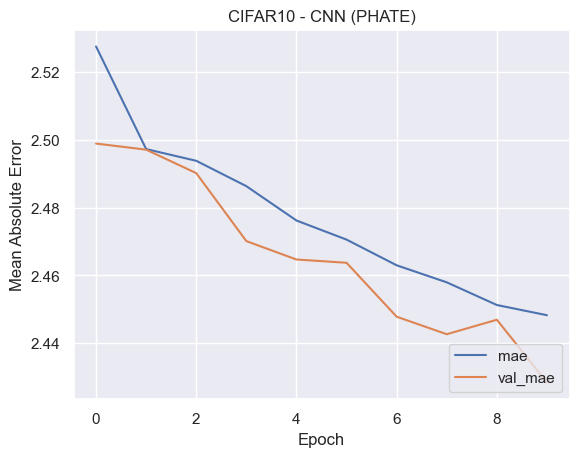

In [97]:
plt.plot(history_phate.history['mae'], label='mae')
plt.plot(history_phate.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='lower right')
plt.title("CIFAR10 - CNN (PHATE)")

loss, mae = model_phate.evaluate(test_phate,  test_labels, verbose=2)

In [98]:
print(mae)

2.4284141063690186
